# Data Exploration and Visualization Demo

In general, a data pipeline for consumption into ML models.

- Data exploration
- Data visualization
- Correlation
- Data cleaning
    - dealing with missing values
    - handeling categorical features
    - feature scaling
- Splitting data into training and test sets


# Data Exploration and Visualization

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Scatter Plots

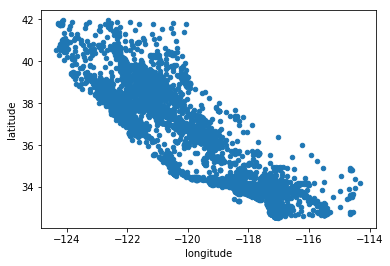

In [5]:
df.plot(kind="scatter", x="longitude", y="latitude")

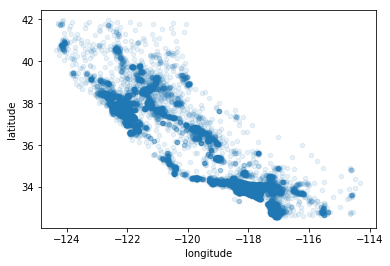

In [6]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

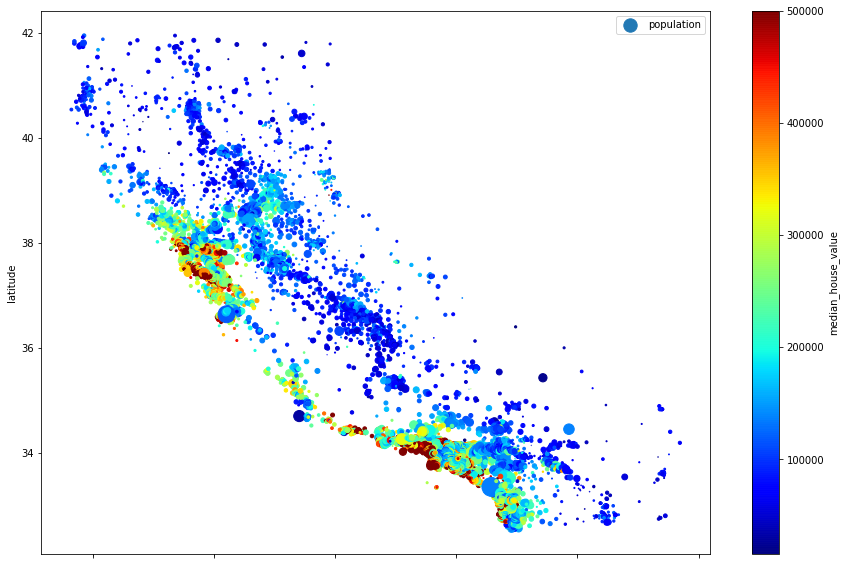

In [7]:
import matplotlib.pyplot as plt
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.99,
       s=df["population"]/100, label="population", figsize=(15,10),
       c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

# Plotting Histograms

Used to visualize distributions and understand key insights within the data.
Some things to notice:
- Are the distributions skewed?
- Are the distributions on a similar scale?
- Do the values make sense?

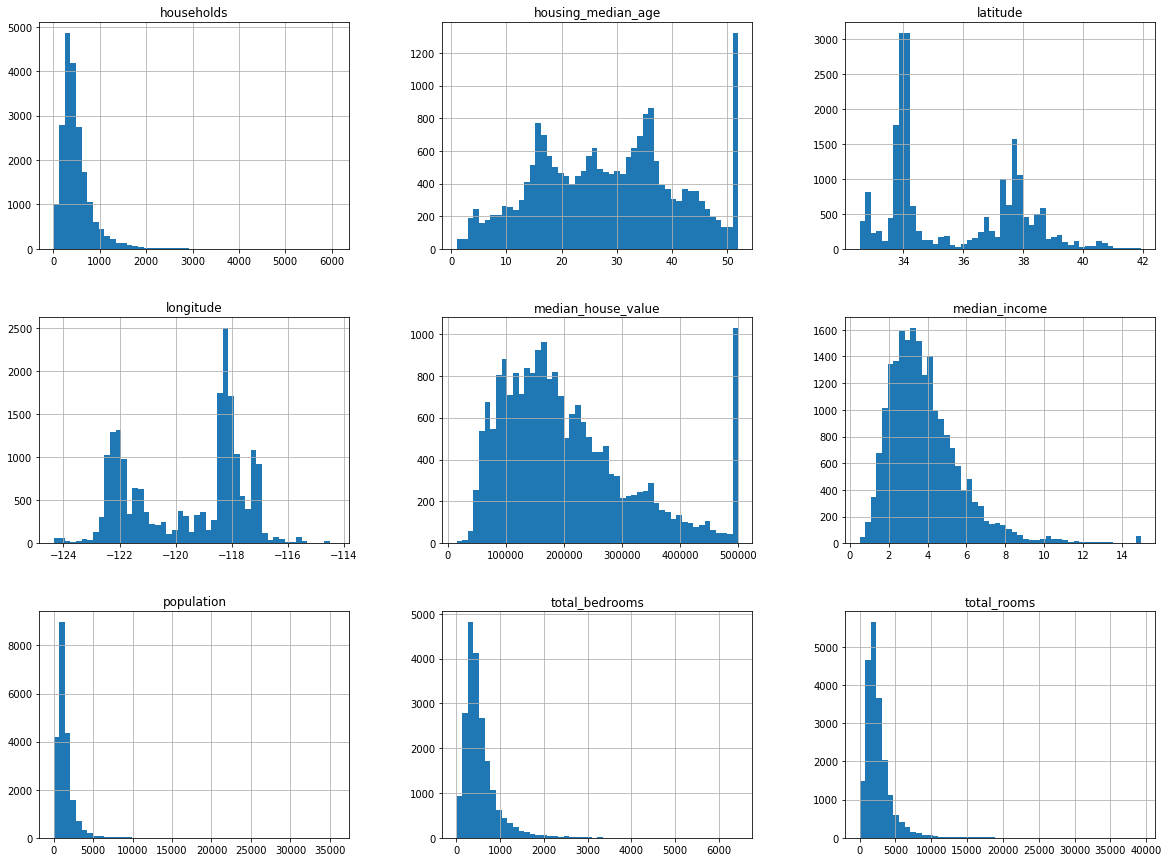

In [8]:

df.hist(bins=50, figsize=(20,15))
plt.show()

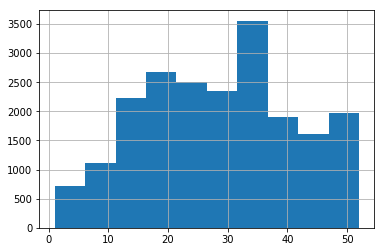

In [9]:
df['housing_median_age'].hist()

# Exploring Correlation

- Correlation coeficcient ranges from -1 to 1.
- Values closer to -1 or 1 represent linear relationships.
- Values close to 0 indicate that the data is either spread out or may be described by non-linear relationships.

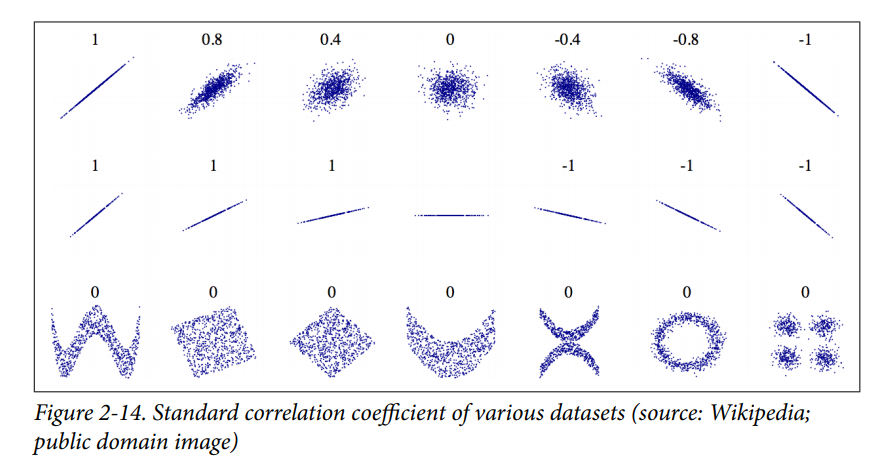

In [10]:
df.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

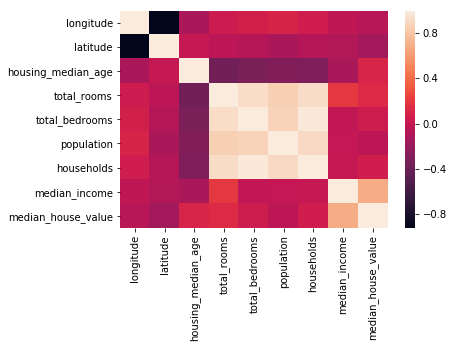

In [11]:
import seaborn as sns

sns.heatmap(df.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ab022e780>,
      dtype=object)

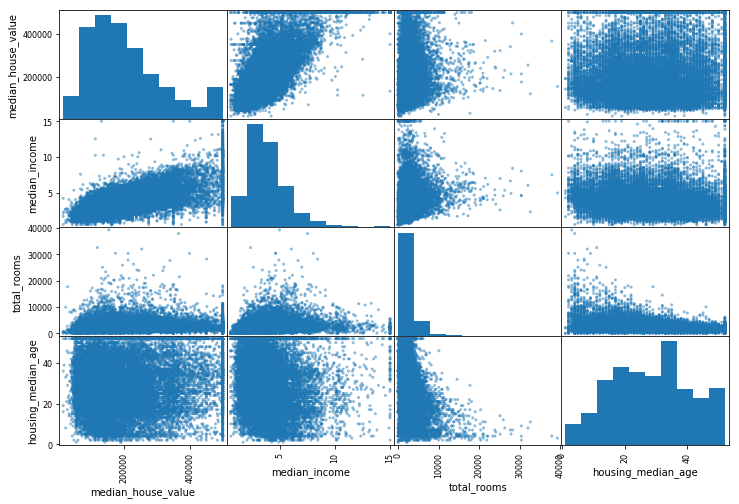

In [12]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12,8))

### Data Cleaning
There are a few options for dealing with missing value:

1. Remove rows that contain missing values.
2. Remove the entire feature / column.
3. Set the missing values equal to some value (mean, median, or zero etc.)

In [13]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [14]:
#df.dropna(subset=["total_bedrooms"]) #option 1
#df.drop("total_bedrooms", axis=1)    #option 2

median = df["total_bedrooms"].median() #option 3
df["total_bedrooms"].fillna(median, inplace=True)

## Handeling Categorical Features

Transform the categorical features "ocean_proximity" to 
numerical values using ordianl encoding.


In [15]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [16]:
df[["ocean_proximity"]].head(10)


,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


## Create an encoder function
### Ordinal Encoding

Create an ordinal encoder function and apply it to the series.

In [17]:
def ordinal_encoder(category):
    dict = {'<1H OCEAN': 0, 'INLAND':1, 'NEAR OCEAN':2, 'NEAR BAY':3, 'ISLAND':4}
    return dict[category]
    
print('<1H OCEAN', ordinal_encoder('<1H OCEAN'))
print('INLAND', ordinal_encoder('INLAND'))
print('NEAR OCEAN', ordinal_encoder('NEAR OCEAN'))
print('NEAR BAY', ordinal_encoder('NEAR BAY'))
print('ISLAND', ordinal_encoder('ISLAND'))
    

<1H OCEAN 0
INLAND 1
NEAR OCEAN 2
NEAR BAY 3
ISLAND 4


In [18]:
df['ocean_proximity'] = df['ocean_proximity'].apply(ordinal_encoder)
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,3
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,3
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,3
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,3


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null int64
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


### One Hot Encoding

In [21]:
def oneHot(category, hot):
    if category == hot:
        return 1
    else:
        return 0

In [22]:
df['<1H OCEAN'] = df['ocean_proximity'].apply(oneHot, hot=0)
df['INLAND'] = df['ocean_proximity'].apply(oneHot, hot=1)
df['NEAR OCEAN'] = df['ocean_proximity'].apply(oneHot, hot=2)
df['NEAR BAY'] = df['ocean_proximity'].apply(oneHot, hot=3)
df['ISLAND'] = df['ocean_proximity'].apply(oneHot, hot=4)

In [23]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,0,0,0,1,0


In [24]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,0,1,0,0,0
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,1,0,1,0,0,0


In [25]:
df = df.drop(['ocean_proximity'],axis=1)

### Create a Scaling Pipeline

Create a scaling pipeline to standardize all the values
in the data frame and return a numpy 2D array with 
the scaled values.

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    #('norm', Normalizer())
])

df_scaled = pipeline.fit_transform(df)

In [27]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
NEAR OCEAN            0
NEAR BAY              0
ISLAND                0
dtype: int64

### Check the distributions

Verify that the data is standardizd and
the means are centered around zero.

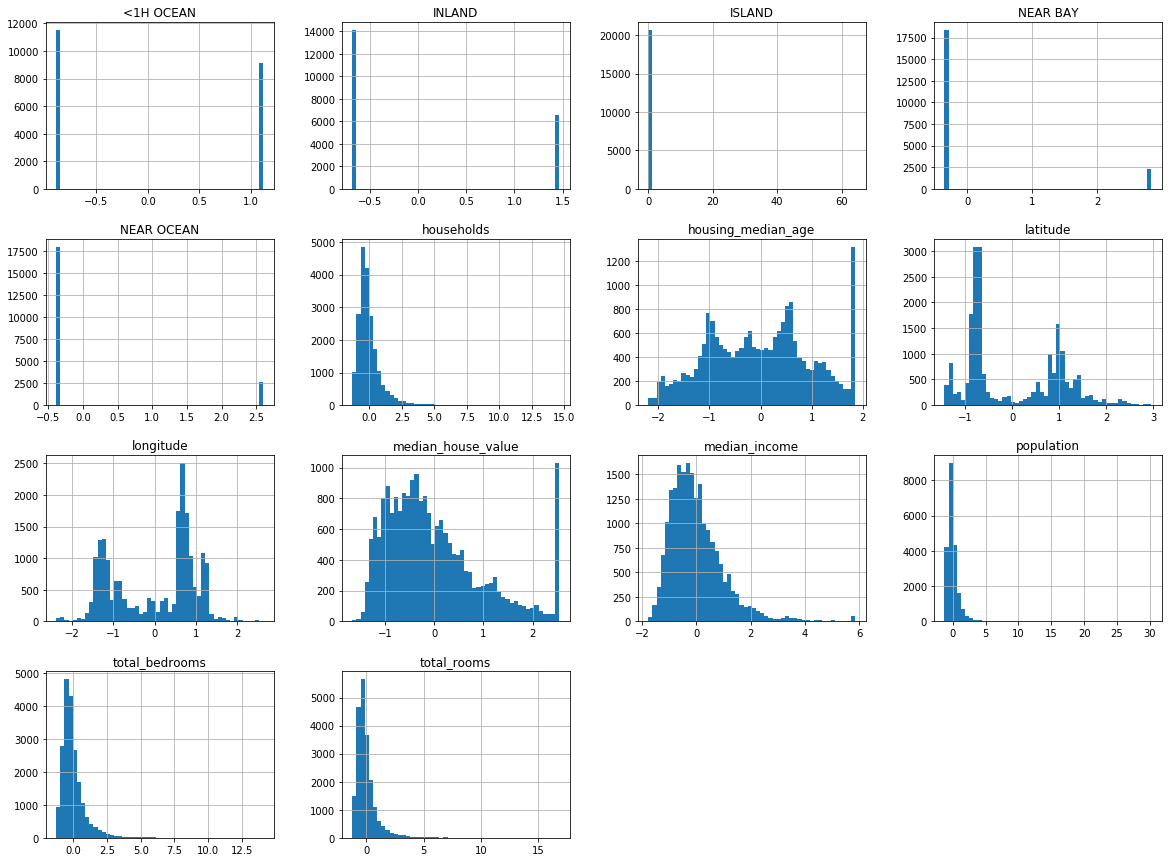

In [28]:
df_scaled.shape
df = pd.DataFrame(df_scaled, columns=list(df))
df.hist(bins=50, figsize=(20,15))
plt.show()

In [29]:
df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

## Splitting the data into training and testing sets

First split data into X (feature vectors) and y (labels)

In [30]:
X = df.drop(['median_house_value'],axis=1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,-0.891156,-0.681889,-0.384466,2.830742,-0.015566
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,-0.891156,-0.681889,-0.384466,2.830742,-0.015566
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,-0.891156,-0.681889,-0.384466,2.830742,-0.015566
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,-0.891156,-0.681889,-0.384466,2.830742,-0.015566
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,-0.891156,-0.681889,-0.384466,2.830742,-0.015566


In [31]:
y = df[['median_house_value']]
y.head()

,median_house_value
0,2.129631
1,1.314156
2,1.258693
3,1.165100
4,1.172900


### Split X and y into training and test sets

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (13828, 13)
X_test (6812, 13)
y_train (13828, 1)
y_test (6812, 1)
